In [194]:
import pandas as pd

In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score, mean_squared_error,r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [135]:
data = pd.read_csv('healthcare.csv')
(data)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [136]:
df_h=pd.read_csv('healthcare.csv')
df_h

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [137]:
df_h.head(30)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,False,False,False,True,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,False,False,False,False,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,False,False,False,False,2
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,False,False,False,False,False,False,True,0
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,False,False,False,True,2


In [138]:
df_h.tail(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
106967,8.973883e+11,5758779,M,2016-06-01,2016-06-01,5,MARIA ORTIZ,False,False,False,False,False,False,True,0
106968,9.433654e+13,5757656,F,2016-06-01,2016-06-01,59,MARIA ORTIZ,False,False,False,False,False,False,True,0
106969,4.952968e+14,5786750,M,2016-06-08,2016-06-08,33,MARIA ORTIZ,False,False,False,False,False,False,True,0
106970,2.362182e+13,5757587,F,2016-06-01,2016-06-01,64,SOLON BORGES,False,False,False,False,False,False,True,0
106971,8.235996e+11,5786742,F,2016-06-08,2016-06-08,14,MARIA ORTIZ,False,False,False,False,False,False,True,0
106972,9.876246e+13,5786368,F,2016-06-08,2016-06-08,41,MARIA ORTIZ,False,False,False,False,False,False,True,0
106973,8.674778e+13,5785964,M,2016-06-08,2016-06-08,2,ANTÔNIO HONÓRIO,False,False,False,False,False,False,True,0
106974,2.695685e+12,5786567,F,2016-06-08,2016-06-08,58,MARIA ORTIZ,False,False,False,False,False,False,True,0
106975,6.456342e+14,5778621,M,2016-06-06,2016-06-08,33,MARIA ORTIZ,False,True,False,False,False,False,False,2
106976,6.923772e+13,5780205,F,2016-06-07,2016-06-08,37,MARIA ORTIZ,False,False,False,False,False,False,False,1


In [139]:
df_h.shape

(106987, 15)

In [178]:
data['ScheduledDay']=pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay']=pd.to_datetime(data['AppointmentDay'])

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       106987 non-null  int64         
 1   AppointmentID   106987 non-null  int64         
 2   Gender          106987 non-null  int64         
 3   ScheduledDay    106987 non-null  datetime64[ns]
 4   AppointmentDay  106987 non-null  datetime64[ns]
 5   Age             106987 non-null  int64         
 6   Neighbourhood   106987 non-null  int64         
 7   Scholarship     106987 non-null  int64         
 8   Hipertension    106987 non-null  int64         
 9   Diabetes        106987 non-null  int64         
 10  Alcoholism      106987 non-null  int64         
 11  Handcap         106987 non-null  int64         
 12  SMS_received    106987 non-null  int64         
 13  Showed_up       106987 non-null  int64         
 14  Date.diff       106987 non-null  int

In [141]:
df_h.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')

In [175]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


In [ ]:
df_h.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,106987.0,1.472814e+14,2.558267e+14,3.921784e+04,4.173523e+12,3.172463e+13,9.433600e+13,9.999816e+14
AppointmentID,106987.0,5.675434e+06,7.133274e+04,5.030230e+06,5.640490e+06,5.680744e+06,5.725634e+06,5.790484e+06
Age,106987.0,3.831609e+01,2.246621e+01,1.000000e+00,1.900000e+01,3.800000e+01,5.600000e+01,1.150000e+02
Date.diff,106987.0,1.016672e+01,1.526351e+01,-6.000000e+00,0.000000e+00,4.000000e+00,1.400000e+01,1.790000e+02


In [144]:
missing_values=df_h.isnull().sum() #missing values%
print(missing_values)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
Showed_up         0
Date.diff         0
dtype: int64


In [145]:
df_h.shape[0]

106987

In [146]:
missing_percentage=df_h.isnull().sum()/df_h.shape[0]
print(missing_percentage)

PatientId         0.0
AppointmentID     0.0
Gender            0.0
ScheduledDay      0.0
AppointmentDay    0.0
Age               0.0
Neighbourhood     0.0
Scholarship       0.0
Hipertension      0.0
Diabetes          0.0
Alcoholism        0.0
Handcap           0.0
SMS_received      0.0
Showed_up         0.0
Date.diff         0.0
dtype: float64


In [147]:
# create a table with data missing 
missing_values=df_h.isnull().sum() # missing values

percent_missing = df_h.isnull().sum()/df_h.shape[0]*100 # missing value %

value = {
    'missing_values ':missing_values,
    'percent_missing %':percent_missing  
}
frame=pd.DataFrame(value)
frame

,missing_values,percent_missing %
PatientId,0,0.0
AppointmentID,0,0.0
Gender,0,0.0
ScheduledDay,0,0.0
AppointmentDay,0,0.0
Age,0,0.0
Neighbourhood,0,0.0
Scholarship,0,0.0
Hipertension,0,0.0
Diabetes,0,0.0


In [158]:
e=LabelEncoder()

labelencoder()-sklearn

onehotencoder()-sklearn

getdummies()-pd #more number of columns

map()

In [161]:
data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up',
       'Date.diff'],
      dtype='object')

In [240]:
data['PatientId']=e.fit_transform(data['PatientId'])
data['AppointmentID']=e.fit_transform(data['AppointmentID'])
data['Gender']=e.fit_transform(data['Gender'])
data['ScheduledDay']=e.fit_transform(data['ScheduledDay'])
data['AppointmentDay']=e.fit_transform(data['AppointmentDay'])
data['Age']=e.fit_transform(data['Age'])
data['Neighbourhood']=e.fit_transform(data['Neighbourhood'])
data['Scholarship']=e.fit_transform(data['Scholarship'])
data['Hipertension']=e.fit_transform(data['Hipertension'])
data['Diabetes']=e.fit_transform(data['Diabetes'])
data['Alcoholism']=e.fit_transform(data['Alcoholism'])
data['Handcap']=e.fit_transform(data['Handcap'])
data['SMS_received']=e.fit_transform(data['SMS_received'])
data['Showed_up']=e.fit_transform(data['Showed_up'])
data['Date.diff']=e.fit_transform(data['Date.diff'])



In [241]:
df_h.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,2016-04-29,2016-04-29,62,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,2016-04-29,2016-04-29,56,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,2016-04-29,2016-04-29,62,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,2016-04-29,2016-04-29,8,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,2016-04-29,2016-04-29,56,False,True,True,False,False,False,True,0


In [242]:
data.rename(columns={'hipertension':'hypertension'},inplace=True)
data.rename(columns={'handcap':'special needs'},inplace=True)
data.rename(columns={'alcoholism':'alcholism'},inplace=True)

In [243]:
data1=data.corr()
data1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
PatientId,1.000000,0.004599,0.011988,0.002630,0.004888,-0.001040,0.006785,-0.000283,0.002482,0.006524,0.008035,-0.008087,-0.007284,0.000574,0.001106
AppointmentID,0.004599,1.000000,0.019289,0.939817,0.705443,0.001973,0.006550,0.012150,0.018018,0.025509,0.030097,0.017370,-0.242768,0.170938,-0.606304
Gender,0.011988,0.019289,1.000000,0.020662,-0.006452,-0.094096,-0.008752,-0.113679,-0.051312,-0.030027,0.110410,0.024599,-0.045852,0.003238,-0.030766
ScheduledDay,0.002630,0.939817,0.020662,1.000000,0.612796,-0.022243,0.006557,0.022151,0.013853,0.023274,0.032858,0.015260,-0.256687,0.163972,-0.762665
AppointmentDay,0.004888,0.705443,-0.006452,0.612796,1.000000,0.010174,0.004058,-0.001981,-0.002853,0.000887,0.002627,-0.003192,0.060080,0.019368,0.037108
Age,-0.001040,0.001973,-0.094096,-0.022243,0.010174,1.000000,-0.011654,-0.112700,0.502135,0.290665,0.090404,0.079585,0.005259,0.067057,0.037581
Neighbourhood,0.006785,0.006550,-0.008752,0.006557,0.004058,-0.011654,1.000000,0.007543,0.006107,0.012501,0.000592,0.010404,0.018917,0.008206,-0.004179
Scholarship,-0.000283,0.012150,-0.113679,0.022151,-0.001981,-0.112700,0.007543,1.000000,-0.024530,-0.027622,0.033527,-0.010465,-0.000010,-0.029370,-0.030773
Hipertension,0.002482,0.018018,-0.051312,0.013853,-0.002853,0.502135,0.006107,-0.024530,1.000000,0.430827,0.085459,0.082909,-0.008805,0.037280,-0.019822
Diabetes,0.006524,0.025509,-0.030027,0.023274,0.000887,0.290665,0.012501,-0.027622,0.430827,1.000000,0.016874,0.057945,-0.016136,0.015928,-0.028478


<Axes: >

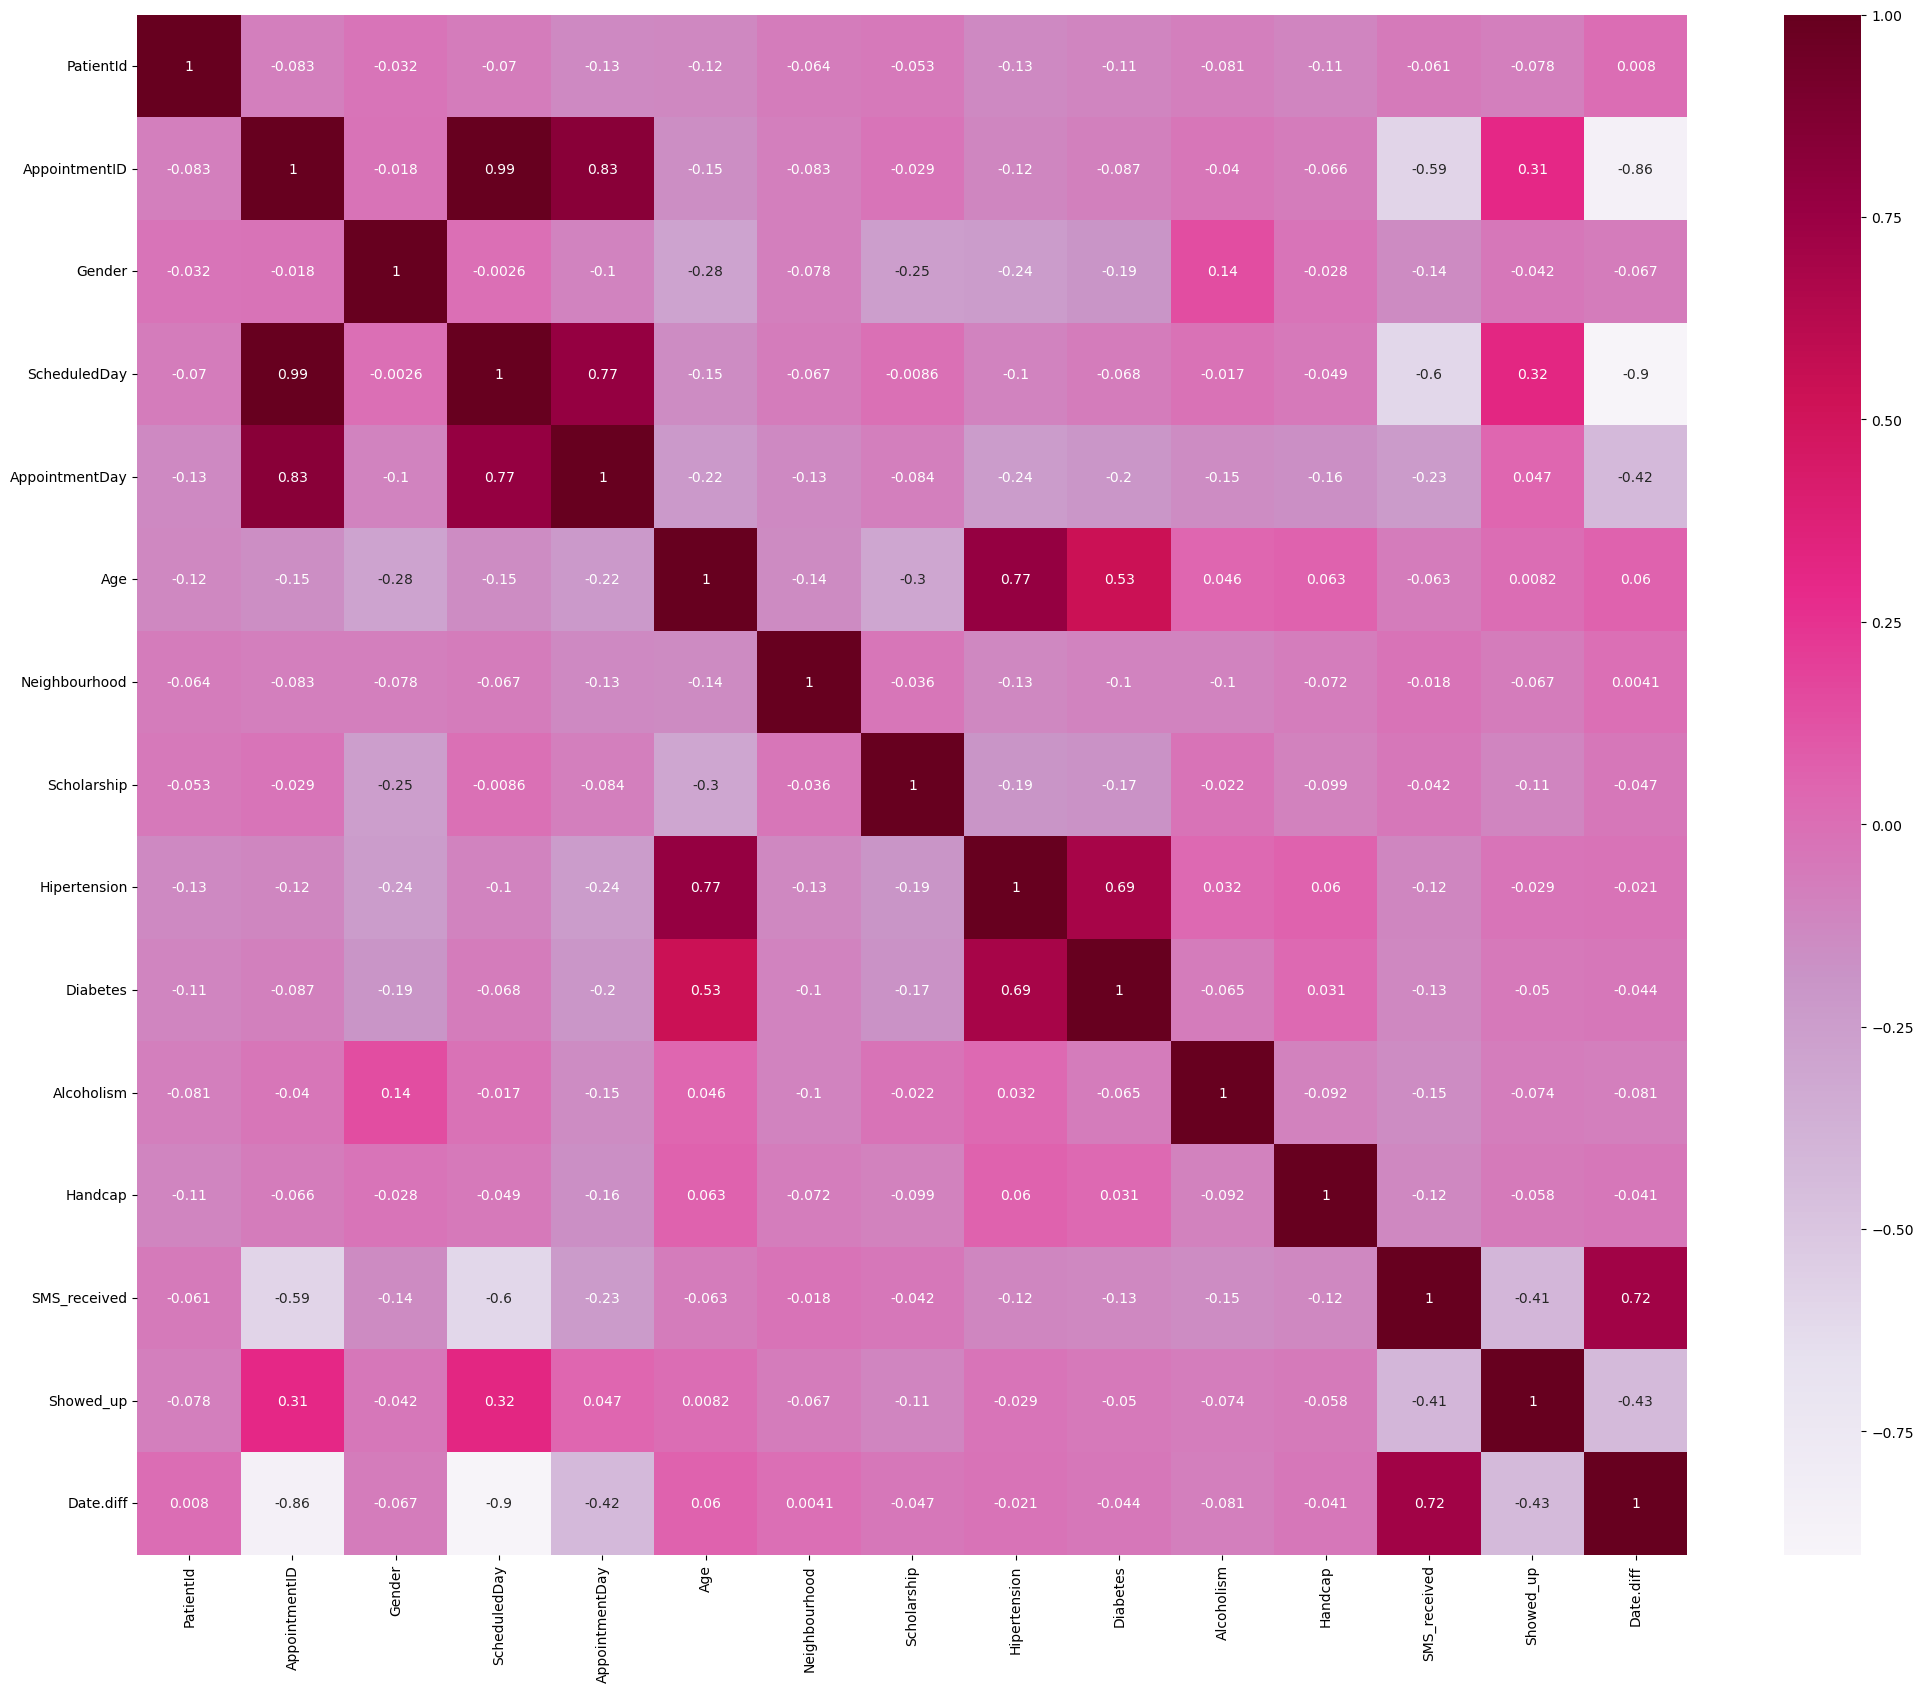

In [244]:
plt.figure(figsize=(25,20))
sns.heatmap(data1.corr(), annot=True, cmap="PuRd")

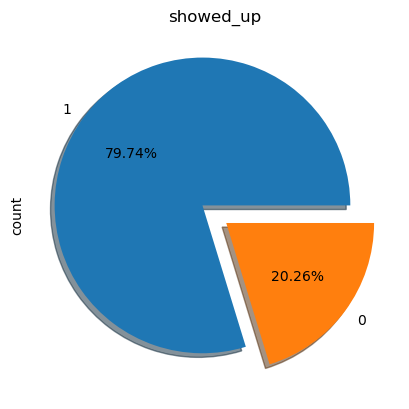

In [245]:
data["Showed_up"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('showed_up');

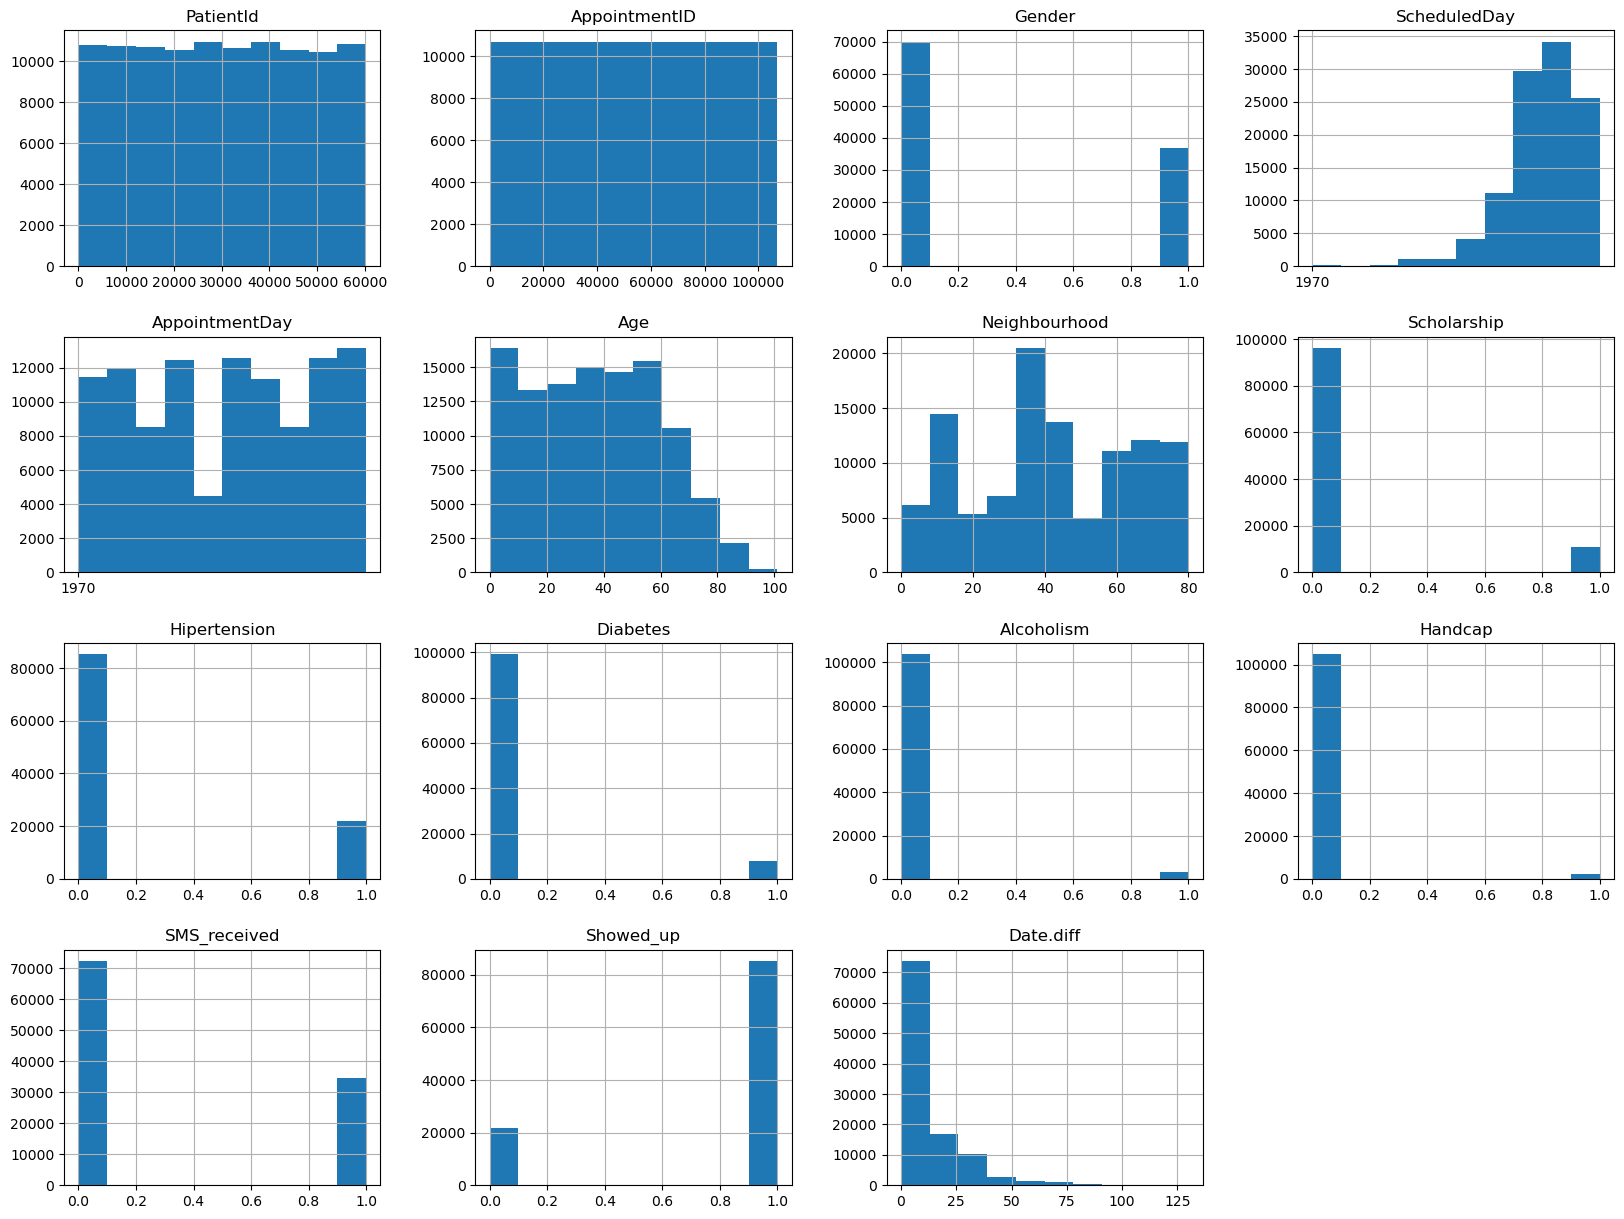

In [ ]:
data.hist(figsize=(20,15));

C:\Users\sunan\AppData\Local\Temp\ipykernel_16236\853214249.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Showed_up',data=df_h, palette="PuRd")


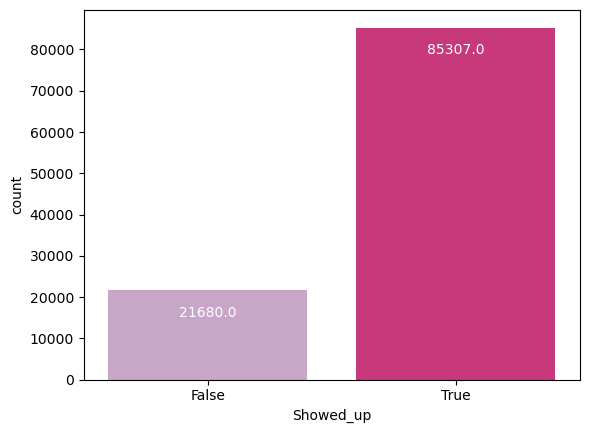

In [190]:
ax = sns.countplot(x='Showed_up',data=df_h, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

C:\Users\sunan\AppData\Local\Temp\ipykernel_16236\3952086871.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Hipertension',data=df_h, palette="Set1")


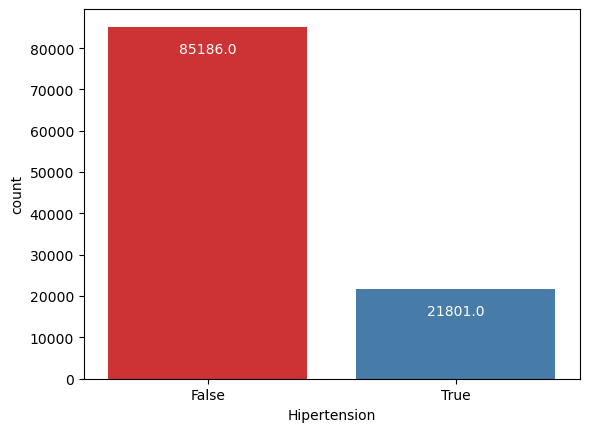

In [ ]:
ax = sns.countplot(x='Hipertension',data=df_h, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

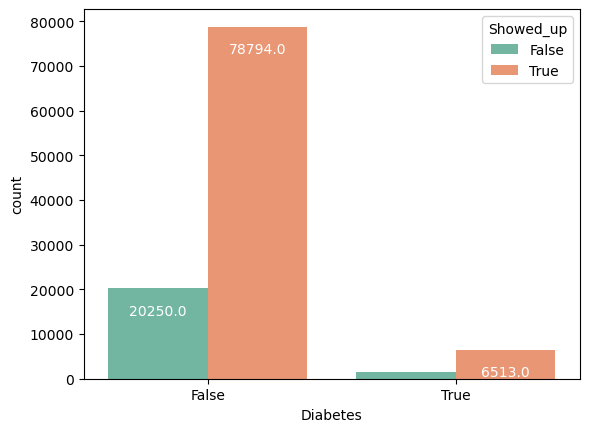

In [196]:
ax = sns.countplot(x='Diabetes',hue='Showed_up',data=df_h, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

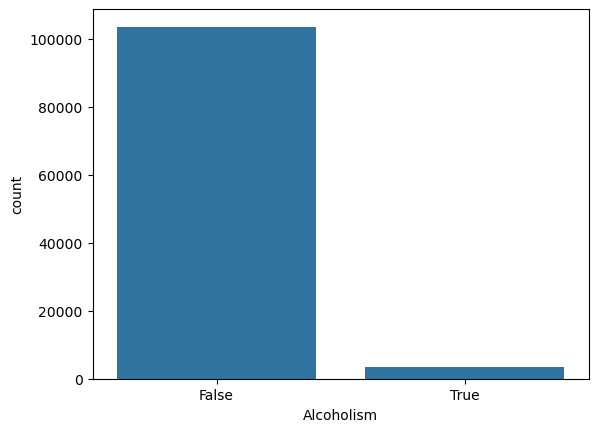

In [197]:
x = sns.countplot(x='Alcoholism',data=df_h)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

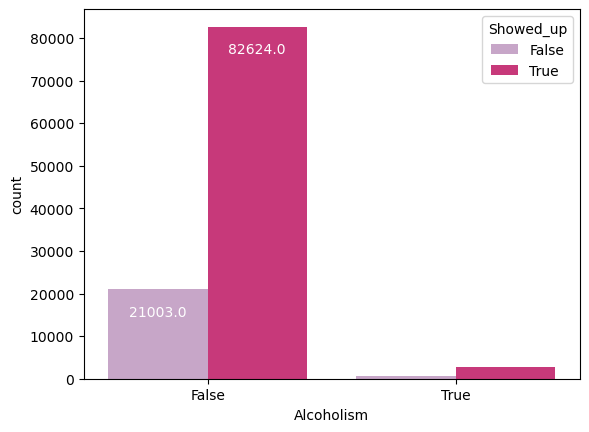

In [198]:
ax = sns.countplot(x='Alcoholism',hue='Showed_up',data=df_h, palette="PuRd")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

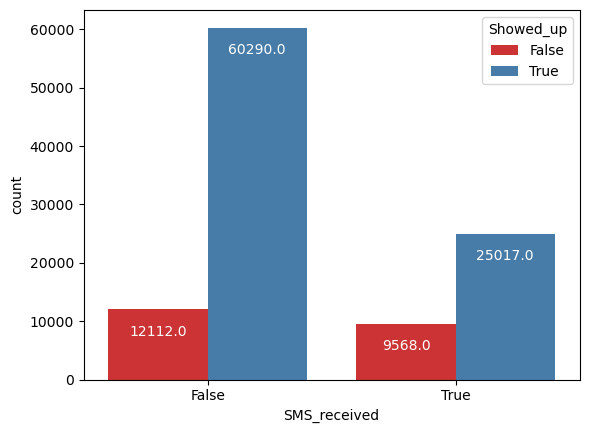

In [199]:
ax = sns.countplot(x='SMS_received',hue='Showed_up',data=df_h, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

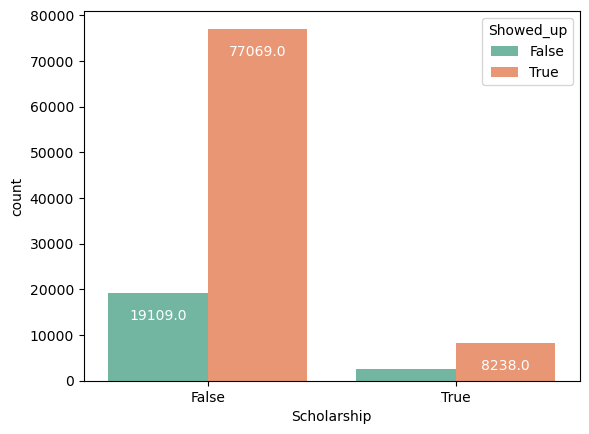

In [202]:
ax = sns.countplot(x='Scholarship',hue='Showed_up',data=df_h, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

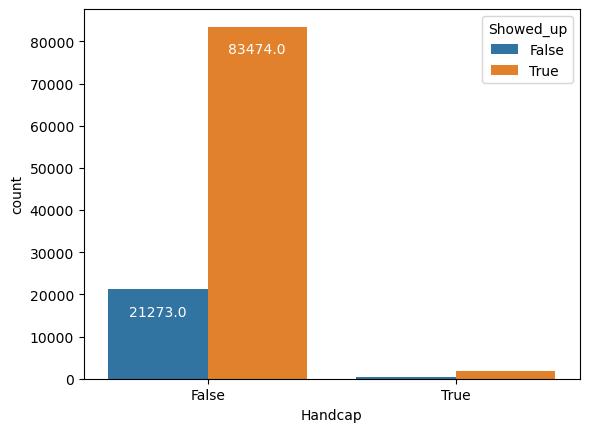

In [205]:
ax = sns.countplot(x='Handcap',hue='Showed_up',data=df_h)
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='white', size=10)
plt.show()

In [206]:
df_h.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [207]:
df_h

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,2.572134e+12,5651768,F,2016-05-03,2016-06-07,56,MARIA ORTIZ,False,False,False,False,False,True,True,35
106983,3.596266e+12,5650093,F,2016-05-03,2016-06-07,51,MARIA ORTIZ,False,False,False,False,False,True,True,35
106984,1.557663e+13,5630692,F,2016-04-27,2016-06-07,21,MARIA ORTIZ,False,False,False,False,False,True,True,41
106985,9.213493e+13,5630323,F,2016-04-27,2016-06-07,38,MARIA ORTIZ,False,False,False,False,False,True,True,41


In [249]:
x_train

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Date.diff
41902,9.855658e+14,5706349,M,2016-05-17,2016-05-17,5,ANDORINHAS,False,False,False,False,False,False,0
77238,7.319969e+13,5729204,M,2016-05-24,2016-05-24,13,ILHA DAS CAIEIRAS,False,False,False,False,False,False,0
63622,6.874759e+13,5728669,F,2016-05-20,2016-05-24,11,JARDIM CAMBURI,False,False,False,False,False,True,4
55684,6.557552e+12,5719343,F,2016-05-19,2016-05-19,79,SANTA MARTHA,False,True,False,False,True,False,0
27086,5.921293e+13,5695547,M,2016-05-13,2016-05-20,27,BENTO FERREIRA,False,False,False,False,False,False,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,9.442983e+12,5726914,F,2016-05-20,2016-05-25,10,JESUS DE NAZARETH,False,False,False,False,False,True,5
73542,4.829698e+13,5642789,M,2016-04-29,2016-05-19,1,SÃO PEDRO,False,False,False,False,False,False,20
83281,4.538123e+13,5538616,F,2016-04-01,2016-06-06,25,JARDIM CAMBURI,False,False,False,False,False,True,66
83467,9.936719e+12,5713219,F,2016-05-18,2016-06-07,1,MÁRIO CYPRESTE,False,False,False,False,False,False,20


In [230]:
accuracies = {}
algo_time={}
r2_scores={}
mean_squared_errors={}
roc_auc_scores={}

In [231]:
def print_performance2(yt,clf,clf_name):
    y_pred=clf.predict(x_test)
    roc_auc_scores[clf_name]=roc_auc_score(yt,y_pred)*100
    mean_squared_errors[clf_name]=mean_squared_error(yt,y_pred)*100
    r2_scores[clf_name]=r2_score(yt,y_pred)*100
    accuracies[clf_name]=clf.score(x_train,y_train)*100
    print('ROC_AUC value :',roc_auc_scores[clf_name],"%",'\n')
    print("Mean Squared Error :",mean_squared_errors[clf_name],"%")
    print("\nR2 score is :",r2_scores[clf_name],"%")
    print("\nAccuracy Score :",accuracies[clf_name],"%")
    print('\nClassification Report : ','\n',classification_report(yt,y_pred))
    
    confusionmatrix=confusion_matrix(yt,y_pred)

    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confusionmatrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confusionmatrix.shape[0]):
        for j in range(confusionmatrix.shape[1]):
            ax.text(x=j, y=i,s=confusionmatrix[i, j], va='center', ha='center', size='xx-large')
 
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)

In [255]:
x=data.drop(['PatientId', 'AppointmentID','Neighbourhood','Showed_up','ScheduledDay','AppointmentDay','Date.diff'],axis=1)
y=data['Showed_up']
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.20, random_state = 101)

In [256]:
x

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,0,61,0,1,0,0,0,0
1,1,55,0,0,0,0,0,0
2,0,61,0,0,0,0,0,0
3,0,7,0,0,0,0,0,0
4,0,55,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
106982,0,55,0,0,0,0,0,1
106983,0,50,0,0,0,0,0,1
106984,0,20,0,0,0,0,0,1
106985,0,37,0,0,0,0,0,1


In [257]:
x.columns

Index(['Gender', 'Age', 'Scholarship', 'Hipertension', 'Diabetes',
       'Alcoholism', 'Handcap', 'SMS_received'],
      dtype='object')

## LOGISTIC REGRESSION 

LOGISTIC REGRESSION
ROC_AUC value : 50.0 % 

Mean Squared Error : 20.100009346667914 %

R2 score is : -25.15646019769551 %

Accuracy Score : 79.69482059610465 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      4301
           1       0.80      1.00      0.89     17097

    accuracy                           0.80     21398
   macro avg       0.40      0.50      0.44     21398
weighted avg       0.64      0.80      0.71     21398



c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


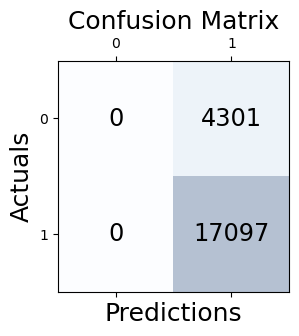

In [258]:
print("LOGISTIC REGRESSION")
start = time.time()
lr = LogisticRegression()
lr.fit(x_train, y_train)
end = time.time()

print_performance2(y_test,lr,'LOGISTIC REGRESSION')
#acc = lr.score(x_train, y_train)*100
#accuracies['LOGISTIC REGRESSION'] = acc
algo_time['LOGISTIC REGRESSION']=end-start

In [262]:
start = time.time()
knn = KNeighborsClassifier()
# assigning the dictionary of variables whose optimium value is to be retrieved
param_grid = {'n_neighbors' : np.arange(1,50)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
# training the model with the training data and best parameter
knn_cv.fit(x_train,y_train)
end=time.time()
algo_time['K-NEAREST NEIGHBOURS']=end-start

In [263]:
# finding out the best parameter chosen to train the model
print("The best paramter we have is: {}" .format(knn_cv.best_params_))

# finding out the best score the chosen parameter achieved
print("The best score we have achieved is: {}" .format(knn_cv.best_score_))

The best paramter we have is: {'n_neighbors': 49}
The best score we have achieved is: 0.7959667669510246


K-NEAREST NEIGHBOURS
ROC_AUC value : 50.11018478926207 % 

Mean Squared Error : 20.104682680624357 %

R2 score is : -25.18555958393074 %

Accuracy Score : 79.70533596607041 %

Classification Report :  
               precision    recall  f1-score   support

           0       0.48      0.00      0.01      4301
           1       0.80      1.00      0.89     17097

    accuracy                           0.80     21398
   macro avg       0.64      0.50      0.45     21398
weighted avg       0.74      0.80      0.71     21398



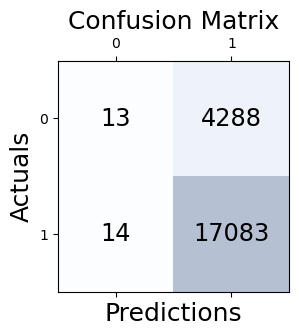

In [269]:
print("K-NEAREST NEIGHBOURS")
print_performance2(y_test,knn_cv,'K-NEAREST NEIGHBOURS')
#acc = knn_cv.score(x_train, y_train)*100
#accuracies['K-NEAREST NEIGHBOURS'] = acc

In [271]:
rf_start=time.time()
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
rf_end=time.time()
algo_time['RANDOM FOREST TREE']=rf_end-rf_start

KeyboardInterrupt: 

In [272]:
# Gender	Age	Scholarship	Hypertension	Diabetes	Alcoholism	Handicap	SMS_received
print("NOT SHOWED UP BASED ON ML ALGORITHMS")
print("Enter 1 for yes and 0for no")
Gender =int(input("Is the pateint male?"))
Age=int(input("Is the patient senior citizen ?"))
Scholarship=int(input("Does the patient have hyper tension"))
Hypertension=int(input("Does the patient have diabetes ?"))
Diabetes=int(input("Does the patient have Diabetes"))
Alcoholism = int(input("Does the patient drink alcohol ? "))
Handicapped = int(input("Is the patient handicapped? "))
SMS_received = int(input("Did the patient receive SMS ? "))
patient = [[Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received]]
result = knn_cv.predict(patient)
print("\nResults : ",result)

if result == 1:
    print('The Patient has not showed up for the appointment.')
    print()
else :
    print('The Patient has showed up for the appointment.')
    print()

NOT SHOWED UP BASED ON ML ALGORITHMS
Enter 1 for yes and 0for no

Results :  [1]
The Patient has not showed up for the appointment.



c:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [273]:
import joblib
#Save as a pickle file
filename='final_model.pkl'
joblib.dump(knn,open(filename,'wb'))
# wb - write binary

In [274]:
pip install -requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'equirements.txt'


In [275]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
